#  Proyek Analytics Data E-Commerce #
* Nama: Muhammad Zakki Mubarroq
* Email: muhhamadzakki06@gmail.com
* ID Dicoding: MS163D5Y0589

## Menentukan Pertanyaan Bisnis ##

   **1. Produk dari Kategori Apa Saja yang Paling Banyak Dibeli tiap bulannya?**
   
   **2.Dari daerah atau kota mana pelanggan berasal dan bagaimana sebaran penjualan berdasarkan geolokasi?**
   
   **3.  Metode pembayaran apa yang paling sering digunakan**

## Import Semua Packages/Library yang Digunakan ##


In [28]:
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\user\\miniforge3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached streamlit-1.41.1-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.6 MB 2.0 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.6 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/12.6 MB 1.7 MB/s eta 0:00:07
   ----- ---------------------------------- 1.8/12.6 MB 1.9 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.6 MB 1.8 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.6 

## Data Wrangling ## 


### Gathering Data
 Pada tahapan ini kita akan melakuakn pengumumpulan data. Dataset yang digunakan adalah dataset yang berisi informasi tentang informasi transaksi e-commerce yang mencakup pelanggan, pesanan, produk, pembayaran, ulasan, serta lokasi geografis. Data pelanggan mencakup ID unik, lokasi, dan kode pos, sedangkan data pesanan mencakup status, waktu pemesanan, serta estimasi pengiriman. Informasi produk dan penjual mencakup kategori, harga, dimensi, serta lokasi penjual. Data pembayaran mencatat metode pembayaran, jumlah cicilan, dan total transaksi, sementara ulasan pelanggan mencakup skor, komentar, dan waktu ulasan. Dengan dataset ini, berbagai analisis dapat dilakukan, seperti perilaku pelanggan, efektivitas pengiriman, serta tren produk dan kepuasan pelanggan. Dataset ini di unduh melalui [Google Drive](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing).

In [30]:
### import library yang diperlukan
import pandas as pandas
from pathlib import Path
from tqdm import tqdm

### menentukan direktori data
data_direktori = Path('data/')

### mencari semua file CSV di direktori
csv_files = list(data_direktori.glob('*.csv'))

### memeriksa apakah direktori ada dan berisi file CSV
if data_direktori.exists():
    print(f"Ditemukan {len(csv_files)} file CSV di direktori {data_direktori}.")
else:
    print (FileNotFoundError(f"Tidak ditemukan direktori {data_direktori}."))

### membaca setiap file CSV dan menggabungkannya menjadi satu DataFrame
list_data = []

for file in tqdm(csv_files, desc="Membaca file CSV"):
    try:
        list_data.append(pandas.read_csv(file))
        print(f"Berhasil membaca {file.name} dengan {len(list_data[0])} baris.")
    except Exception as e:
        print(f"Gagal membaca {file.name}: {e}")


### menggabungkan semua DataFrame menjadi satu DataFrame
if list_data:
    table = pandas.concat(list_data, ignore_index=True)
    print(f"Data gabungan memiliki {table.shape[0]} baris dan {table.shape[1]} kolom.")
else:
    raise ValueError("Tidak ada data yang berhasil dibaca.")

table.head()


Ditemukan 9 file CSV di direktori data.


Membaca file CSV:  11%|█         | 1/9 [00:00<00:04,  1.93it/s]

Berhasil membaca customers_dataset.csv dengan 99441 baris.


Membaca file CSV:  22%|██▏       | 2/9 [00:01<00:03,  1.84it/s]

Berhasil membaca geolocation_dataset.csv dengan 99441 baris.


Membaca file CSV:  44%|████▍     | 4/9 [00:01<00:01,  3.05it/s]

Berhasil membaca orders_dataset.csv dengan 99441 baris.
Berhasil membaca order_items_dataset.csv dengan 99441 baris.
Berhasil membaca order_payments_dataset.csv dengan 99441 baris.


Membaca file CSV: 100%|██████████| 9/9 [00:01<00:00,  4.63it/s]

Berhasil membaca order_reviews_dataset.csv dengan 99441 baris.
Berhasil membaca products_dataset.csv dengan 99441 baris.
Berhasil membaca product_category_name_translation.csv dengan 99441 baris.
Berhasil membaca sellers_dataset.csv dengan 99441 baris.


Data gabungan memiliki 1550922 baris dan 45 kolom.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Insights:
* Datasets memiliki 9 file dengan format .csv
* Data Gabungan memiliki 45 kolom dan 1550922 baris
* Data mencakup informasi lebih dari 99.000 pelanggan dan lebih dari 32.000 produk yang dijual, memberikan gambaran yang komprehensif tentang pola transaksi dan kepuasan pelanggan.

## Assesing Data 

Pada tahap ini, kita akan melakukan analisis data untuk menilai data yang nantinya akan digunakan struktur, kualitas dan isinya sebelum dilakukan lebih lanjut.

In [ ]:
### Melihat informasi dasar dataset
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550922 entries, 0 to 1550921
Data columns (total 45 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   customer_id                    198882 non-null   object 
 1   customer_unique_id             99441 non-null    object 
 2   customer_zip_code_prefix       99441 non-null    float64
 3   customer_city                  99441 non-null    object 
 4   customer_state                 99441 non-null    object 
 5   geolocation_zip_code_prefix    1000163 non-null  float64
 6   geolocation_lat                1000163 non-null  float64
 7   geolocation_lng                1000163 non-null  float64
 8   geolocation_city               1000163 non-null  object 
 9   geolocation_state              1000163 non-null  object 
 10  order_id                       415201 non-null   object 
 11  order_status                   99441 non-null    object 
 12  order_purchase

In [ ]:
### Menmpailkan data secara statistik
table.describe()

,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,99441.000000,1.000163e+06,1.000163e+06,1.000163e+06,112650.000000,112650.000000,112650.000000,103886.000000,103886.000000,103886.000000,99224.000000,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,3095.000000
mean,35137.474583,3.657417e+04,-2.117615e+01,-4.639054e+01,1.197834,120.653739,19.990320,1.092679,2.853349,154.100380,4.086421,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,32291.059451
std,29797.938996,3.054934e+04,5.715866e+00,4.269748e+00,0.705124,183.633928,15.806405,0.706584,2.687051,217.494064,1.347579,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,32713.453830
min,1003.000000,1.001000e+03,-3.660537e+01,-1.014668e+02,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11347.000000,1.107500e+04,-2.360355e+01,-4.857317e+01,1.000000,39.900000,13.080000,1.000000,1.000000,56.790000,4.000000,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,7093.500000
50%,24416.000000,2.653000e+04,-2.291938e+01,-4.663788e+01,1.000000,74.990000,16.260000,1.000000,1.000000,100.000000,5.000000,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,14940.000000
75%,58900.000000,6.350400e+04,-1.997962e+01,-4.376771e+01,1.000000,134.900000,21.150000,1.000000,4.000000,171.837500,5.000000,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,64552.500000
max,99990.000000,9.999000e+04,4.506593e+01,1.211054e+02,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [ ]:
### Menmpailkan Jumlah Nilai yang hilang  per kolom
table.isnull().sum()

customer_id                      1352040
customer_unique_id               1451481
customer_zip_code_prefix         1451481
customer_city                    1451481
customer_state                   1451481
geolocation_zip_code_prefix       550759
geolocation_lat                   550759
geolocation_lng                   550759
geolocation_city                  550759
geolocation_state                 550759
order_id                         1135721
order_status                     1451481
order_purchase_timestamp         1451481
order_approved_at                1451641
order_delivered_carrier_date     1453264
order_delivered_customer_date    1454446
order_estimated_delivery_date    1451481
order_item_id                    1438272
product_id                       1405321
seller_id                        1435177
shipping_limit_date              1438272
price                            1438272
freight_value                    1438272
payment_sequential               1447036
payment_type    

In [ ]:
### Menmpailkan jumla nlia yang unik
print("Jumlah nilai unik per kolom:")
for column in table.select_dtypes(include=['object']).columns:
    unique_values = table[column].nunique()
    print(f"- {column}: {unique_values} nilai unik")

Jumlah nilai unik per kolom:
- customer_id: 99441 nilai unik
- customer_unique_id: 96096 nilai unik
- customer_city: 4119 nilai unik
- customer_state: 27 nilai unik
- geolocation_city: 8011 nilai unik
- geolocation_state: 27 nilai unik
- order_id: 99441 nilai unik
- order_status: 8 nilai unik
- order_purchase_timestamp: 98875 nilai unik
- order_approved_at: 90733 nilai unik
- order_delivered_carrier_date: 81018 nilai unik
- order_delivered_customer_date: 95664 nilai unik
- order_estimated_delivery_date: 459 nilai unik
- product_id: 32951 nilai unik
- seller_id: 3095 nilai unik
- shipping_limit_date: 93318 nilai unik
- payment_type: 5 nilai unik
- review_id: 98410 nilai unik
- review_comment_title: 4527 nilai unik
- review_comment_message: 36159 nilai unik
- review_creation_date: 636 nilai unik
- review_answer_timestamp: 98248 nilai unik
- product_category_name: 73 nilai unik
- product_category_name_english: 71 nilai unik
- seller_city: 611 nilai unik
- seller_state: 23 nilai unik


### Insight 
  *  # Informasi Dasar Dataset 

      Dataset ini terdiri dari total **1.550.922** entri dengan **45 kolom** yang mencakup berbagai aspek transaksi pelanggan, geolokasi, pesanan, pembayaran, ulasan, hingga detail produk dan penjual. Berikut adalah rincian informasi dari masing-masing kolom:
      
      ## 1. Informasi Pelanggan
      - **customer_id** memiliki **198.882** nilai non-null, yang merepresentasikan ID unik pelanggan.
      - **customer_unique_id** memiliki **99.441** nilai non-null, menunjukkan pelanggan yang unik berdasarkan transaksi.
      - **customer_zip_code_prefix** memiliki **99.441** nilai non-null dengan tipe data **float64**, menunjukkan kode pos pelanggan.
      - **customer_city** memiliki **99.441** nilai non-null, menampilkan nama kota tempat pelanggan berada.
      - **customer_state** memiliki **99.441** nilai non-null, mengindikasikan negara bagian tempat pelanggan berada.
      
      ## 2. Informasi Geolokasi
      - **geolocation_zip_code_prefix** memiliki **1.000.163** nilai non-null, yang menunjukkan kode pos berdasarkan lokasi geografis.
      - **geolocation_lat** memiliki **1.000.163** nilai non-null dengan tipe data **float64**, yang merepresentasikan garis lintang lokasi pelanggan.
      - **geolocation_lng** memiliki **1.000.163** nilai non-null dengan tipe data **float64**, yang menunjukkan garis bujur lokasi pelanggan.
      - **geolocation_city** memiliki **1.000.163** nilai non-null, menyajikan nama kota berdasarkan lokasi geografis.
      - **geolocation_state** memiliki **1.000.163** nilai non-null, yang menunjukkan negara bagian berdasarkan lokasi geografis.
      
      ## 3. Informasi Pesanan
      - **order_id** memiliki **415.201** nilai non-null, yang merupakan ID unik setiap pesanan.
      - **order_status** memiliki **99.441** nilai non-null, menunjukkan status pesanan.
      - **order_purchase_timestamp** memiliki **99.441** nilai non-null dengan tipe data **object**, yang merepresentasikan waktu pembelian pesanan.
      - **order_approved_at** memiliki **99.281** nilai non-null, yang menunjukkan waktu persetujuan pesanan.
      - **order_delivered_carrier_date** memiliki **97.658** nilai non-null, merepresentasikan tanggal pesanan dikirim oleh kurir.
      - **order_delivered_customer_date** memiliki **96.476** nilai non-null, yang menunjukkan tanggal pesanan diterima oleh pelanggan.
      - **order_estimated_delivery_date** memiliki **99.441** nilai non-null, yang mencerminkan tanggal estimasi pengiriman pesanan.
      
      ## 4. Informasi Produk dan Penjual
      - **order_item_id** memiliki **112.650** nilai non-null, yang merepresentasikan ID unik barang dalam pesanan.
      - **product_id** memiliki **145.601** nilai non-null, yang menunjukkan ID unik produk.
      - **seller_id** memiliki **115.745** nilai non-null, merepresentasikan ID unik penjual.
      - **shipping_limit_date** memiliki **112.650** nilai non-null, menunjukkan batas waktu pengiriman pesanan.
      - **price** memiliki **112.650** nilai non-null dengan tipe data **float64**, yang menampilkan harga produk dalam transaksi.
      - **freight_value** memiliki **112.650** nilai non-null, menunjukkan biaya pengiriman dalam transaksi.
      
      ## 5. Informasi Pembayaran
      - **payment_sequential** memiliki **103.886** nilai non-null, yang merepresentasikan urutan pembayaran dalam transaksi.
      - **payment_type** memiliki **103.886** nilai non-null, menunjukkan metode pembayaran yang digunakan.
      - **payment_installments** memiliki **103.886** nilai non-null, yang mengindikasikan jumlah cicilan pembayaran.
      - **payment_value** memiliki **103.886** nilai non-null dengan tipe data **float64**, yang merepresentasikan nilai total pembayaran dalam transaksi.
      
      ## 6. Informasi Ulasan Produk
      - **review_id** memiliki **99.224** nilai non-null, yang menunjukkan ID unik ulasan pelanggan.
      - **review_score** memiliki **99.224** nilai non-null dengan tipe data **float64**, menunjukkan skor ulasan dari pelanggan.
      - **review_comment_title** memiliki **11.568** nilai non-null, yang mencerminkan judul ulasan pelanggan.
      - **review_comment_message** memiliki **40.977** nilai non-null, menunjukkan isi komentar ulasan pelanggan.
      - **review_creation_date** memiliki **99.224** nilai non-null, yang merepresentasikan tanggal pembuatan ulasan.
      - **review_answer_timestamp** memiliki **99.224** nilai non-null, yang menunjukkan waktu penjawaban ulasan dari sistem atau penjual.
      
      ## 7. Informasi Detail Produk
      - **product_category_name** memiliki **32.412** nilai non-null, yang menunjukkan kategori produk dalam bahasa asli.
      - **product_name_lenght** memiliki **32.341** nilai non-null, merepresentasikan panjang nama produk dalam jumlah karakter.
      - **product_description_lenght** memiliki **32.341** nilai non-null, yang menunjukkan panjang deskripsi produk dalam jumlah karakter.
      - **product_photos_qty** memiliki **32.341** nilai non-null, yang mencerminkan jumlah foto produk yang tersedia.
      - **product_weight_g** memiliki **32.949** nilai non-null, yang menunjukkan berat produk dalam gram.
      - **product_length_cm** memiliki **32.949** nilai non-null, merepresentasikan panjang produk dalam satuan sentimeter.
      - **product_height_cm** memiliki **32.949** nilai non-null, menunjukkan tinggi produk dalam satuan sentimeter.
      - **product_width_cm** memiliki **32.949** nilai non-null, yang menunjukkan lebar produk dalam satuan sentimeter.
      - **product_category_name_english** memiliki **71** nilai non-null, yang menunjukkan kategori produk dalam bahasa Inggris.
      
      ## 8. Informasi Penjual
      - **seller_zip_code_prefix** memiliki **3.095** nilai non-null, menunjukkan kode pos dari lokasi penjual.
      - **seller_city** memiliki **3.095** nilai non-null, yang mencerminkan nama kota tempat penjual berada.
      - **seller_state** memiliki **3.095** nilai non-null, yang menunjukkan negara bagian tempat penjual berada.
      
      ## 9. Ringkasan
      - Dataset ini memiliki **532.5+ MB** dalam ukuran memori.
      - Sebagian besar kolom memiliki tipe data **object** dan **float64**.
      - Ada beberapa kolom yang memiliki banyak nilai **null**, terutama pada informasi ulasan dan detail produk.
      - Dataset ini mencakup berbagai aspek transaksi e-commerce, dari pelanggan hingga ulasan produk.
      
      Dengan memahami struktur dataset ini, kita dapat lebih mudah menganalisis serta mengolah data untuk berbagai keperluan bisnis maupun penelitian.
      


  * # Informasi Data statistik
     
     **Statistik Deskriptif:**

      ### **Kode Pos (Zip Code):**
      - **customer_zip_code_prefix** memiliki rata-rata **35137.47**, dengan nilai minimum **1003** dan maksimum **99990**.
      - **geolocation_zip_code_prefix** memiliki rata-rata **36,574.17**, dengan nilai minimum **1001** dan maksimum **99990**.
      - **seller_zip_code_prefix** memiliki rata-rata **32291.06**, dengan nilai minimum **1001** dan maksimum **99730**.

      ### **Geolokasi:**
      - **geolocation_lat** memiliki rata-rata **-21.18**, dengan nilai minimum **-36.61** dan maksimum **45.07**.
      - **geolocation_lng** memiliki rata-rata **-46.39**, dengan nilai minimum **-101.47** dan maksimum **121.11**.

      ### **Pesanan dan Pembayaran:**
      - **order_item_id** memiliki rata-rata **1.20**, dengan nilai minimum **1** dan maksimum **21**.
      - **price** memiliki rata-rata **120.65**, dengan nilai minimum **0.85** dan maksimum **6735**.
      - **freight_value** memiliki rata-rata **19.99**, dengan nilai minimum **0.00** dan maksimum **409.68**.
      - **payment_sequential** memiliki rata-rata **1.09**, dengan nilai minimum **1** dan maksimum **29**.
      - **payment_installments** memiliki rata-rata **2.85**, dengan nilai minimum **0** dan maksimum **24**.
      - **payment_value** memiliki rata-rata **154.10**, dengan nilai minimum **0.00** dan maksimum **13664.08**.

      ### **Rating dan Ulasan:**
      - **review_score** memiliki rata-rata **4.09**, dengan nilai minimum **1** dan maksimum **5**.

      ### **Deskripsi Produk:**
      - **product_name_length** memiliki rata-rata **48.48**, dengan nilai minimum **5** dan maksimum **76**.
      - **product_description_length** memiliki rata-rata **771.50**, dengan nilai minimum **4** dan maksimum **3992**.
      - **product_photos_qty** memiliki rata-rata **2.19**, dengan nilai minimum **1** dan maksimum **20**.

      ### **Dimensi dan Berat Produk:**
      - **product_weight_g** memiliki rata-rata **2276.47**, dengan nilai minimum **0** dan maksimum **40425**.
      - **product_length_cm** memiliki rata-rata **30.82**, dengan nilai minimum **7** dan maksimum **105**.
      - **product_height_cm** memiliki rata-rata **16.94**, dengan nilai minimum **2** dan maksimum **105**.
      - **product_width_cm** memiliki rata-rata **23.20**, dengan nilai minimum **6** dan maksimum **118**.


* # Jumlah Nilai yang Hilang per Kolom:

    ### **Informasi Pelanggan:**
    - **customer_id** memiliki **1,352,040** nilai yang hilang.
    - **customer_unique_id** memiliki **1,451,481** nilai yang hilang.
    - **customer_zip_code_prefix** memiliki **1,451,481** nilai yang hilang.
    - **customer_city** memiliki **1,451,481** nilai yang hilang.
    - **customer_state** memiliki **1,451,481** nilai yang hilang.
    
    ### **Geolokasi:**
    - **geolocation_zip_code_prefix** memiliki **550,759** nilai yang hilang.
    - **geolocation_lat** memiliki **550,759** nilai yang hilang.
    - **geolocation_lng** memiliki **550,759** nilai yang hilang.
    - **geolocation_city** memiliki **550,759** nilai yang hilang.
    - **geolocation_state** memiliki **550,759** nilai yang hilang.
    
    ### **Informasi Pesanan:**
    - **order_id** memiliki **1,135,721** nilai yang hilang.
    - **order_status** memiliki **1,451,481** nilai yang hilang.
    - **order_purchase_timestamp** memiliki **1,451,481** nilai yang hilang.
    - **order_approved_at** memiliki **1,451,641** nilai yang hilang.
    - **order_delivered_carrier_date** memiliki **1,453,264** nilai yang hilang.
    - **order_delivered_customer_date** memiliki **1,454,446** nilai yang hilang.
    
    ### **Informasi Pembayaran:**
    - **payment_sequential** memiliki **1,447,036** nilai yang hilang.
    - **payment_type** memiliki **1,447,036** nilai yang hilang.
    - **payment_installments** memiliki **1,447,036** nilai yang hilang.
    - **payment_value** memiliki **1,447,036** nilai yang hilang.
    
    ### **Ulasan Produk:**
    - **review_id** memiliki **1,451,698** nilai yang hilang.
    - **review_score** memiliki **1,451,698** nilai yang hilang.
    - **review_comment_title** memiliki **1,539,354** nilai yang hilang.
    - **review_comment_message** memiliki **1,509,945** nilai yang hilang.
    
    ### **Informasi Produk:**
    - **product_category_name** memiliki **1,518,510** nilai yang hilang.
    - **product_name_length** memiliki **1,518,581** nilai yang hilang.
    - **product_description_length** memiliki **1,518,581** nilai yang hilang.
    - **product_photos_qty** memiliki **1,518,581** nilai yang hilang.
    
    ### **Dimensi dan Berat Produk:**
    - **product_weight_g** memiliki **1,517,973** nilai yang hilang.
    - **product_length_cm** memiliki **1,517,973** nilai yang hilang.
    - **product_height_cm** memiliki **1,517,973** nilai yang hilang.
    - **product_width_cm** memiliki **1,517,973** nilai yang hilang.
    
    ### **Informasi Penjual:**
    - **seller_zip_code_prefix** memiliki **1,547,827** nilai yang hilang.
    - **seller_city** memiliki **1,547,827** nilai yang hilang.
    - **seller_state** memiliki **1,547,827** nilai yang hilang.



* # Jumlah Nilai Unik per Kolom:

    ### **Informasi Pelanggan:**
    - **customer_id**: **99,441** nilai unik.
    - **customer_unique_id**: **96,096** nilai unik.
    - **customer_city**: **4,119** nilai unik.
    - **customer_state**: **27** nilai unik.

    ### **Geolokasi:**
    - **geolocation_city**: **8,011** nilai unik.
    - **geolocation_state**: **27** nilai unik.

    ### **Informasi Pesanan:**
    - **order_id**: **99,441** nilai unik.
    - **order_status**: **8** nilai unik.
    - **order_purchase_timestamp**: **98,875** nilai unik.
    - **order_approved_at**: **90,733** nilai unik.
    - **order_delivered_carrier_date**: **81,018** nilai unik.
    - **order_delivered_customer_date**: **95,664** nilai unik.
    - **order_estimated_delivery_date**: **459** nilai unik.

    ### **Informasi Produk & Penjual:**
    - **product_id**: **32,951** nilai unik.
    - **seller_id**: **3,095** nilai unik.
    - **shipping_limit_date**: **93,318** nilai unik.

    ### **Informasi Pembayaran:**
    - **payment_type**: **5** nilai unik.

    ### **Ulasan Produk:**
    - **review_id**: **98,410** nilai unik.
    - **review_comment_title**: **4,527** nilai unik.
    - **review_comment_message**: **36,159** nilai unik.
    - **review_creation_date**: **636** nilai unik.
    - **review_answer_timestamp**: **98,248** nilai unik.

    ### **Kategori Produk:**
    - **product_category_name**: **73** nilai unik.
    - **product_category_name_english**: **71** nilai unik.

    ### **Informasi Penjual:**
    - **seller_city**: **611** nilai unik.
    - **seller_state**: **23** nilai unik.


      
      

**Cleaning Data**

Pada tahapan ini, kita akan melakukan pembersihan data untuk memastikan kualitas data sebelum digunakan dalam analisis lebih lanjut. Pembersihan ini mencakup beberapa langkah penting untuk mengatasi masalah seperti nilai hilang, duplikasi, dan konsistensi data.

1. **Menangani Nilai yang Hilang:**
   - Mengisi nilai yang hilang pada kolom numerik dengan **median** agar tidak terpengaruh oleh outlier.
   - Mengisi nilai yang hilang pada kolom kategorikal dengan **modus** atau kategori khusus seperti `'Unknown'` jika data kategorikal penting.
   
2. **Menghapus Duplikasi:**
   - Memeriksa dan menghapus **baris duplikat** yang mungkin ada pada data untuk mencegah analisis yang salah akibat data yang terduplikasi.
   

3. **Menghapus Outliers**
    - Ini penting agar analisis tidak terdistorsi oleh nilai-nilai ekstrem yang tidak mewakili pola umum data. Jadi, meskipun tidak termasuk dalam empat langkah yang kamu sebutkan, penghapusan outliers merupakan langkah tambahan yang sangat berguna dalam menyiapkan data untuk analisis.



**Mengani nilia yang hilang**

Dalam proses analisis data, menangani nilai yang hilang merupakan langkah krusial untuk memastikan kualitas dan keakuratan hasil. Kode di atas menggunakan pendekatan berbeda untuk menangani nilai yang hilang pada kolom numerik dan kategorikal. Untuk kolom numerik (integer dan float), nilai yang hilang diisi dengan median dari masing-masing kolom. Median dipilih karena lebih tahan terhadap outlier dibandingkan dengan rata-rata. Dengan demikian, nilai ekstrem tidak akan terlalu mempengaruhi pengisian data yang hilang.



In [22]:
number_value = table.select_dtypes(include=['integer', 'float']).columns.to_list()

table[number_value] = table[number_value].fillna(table[number_value].median())

categories = table.select_dtypes(include=['object']).columns.tolist()

for column in categories:
    value = table[column].value_counts().index[0]
    table[column] = table[column].fillna(value)

print("\nJumlah nilai yang hilang setelah penanganan:")
print(table.isnull().sum())


Jumlah nilai yang hilang setelah penanganan:
customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_zip_code_prefix      0
geolocation_lat                  0
geolocation_lng                  0
geolocation_city                 0
geolocation_state                0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id

**Menghapus Duplikasi** 

Langkah selanjutnya dalah menghitung jumlah data yang terduplikasi dan menghapus duplikasi data tersebut selanjutnya memeriksa apakah data duplikasi masih ada atau tidak.

In [23]:
duplica_value = table.duplicated().sum()
print(f"\nJumlah data duplikasi: {duplica_value}")

table = table.drop_duplicates()

duplica_value_after = table.duplicated().sum()
print(f"\nJumlah data duplikasi setelah dihapus: {duplica_value_after}")

duplicate_count = table.duplicated().sum()
print(f"\nJumlah duplikasi sesudah penghapusan: {duplicate_count}")


Jumlah data duplikasi: 261831

Jumlah data duplikasi setelah dihapus: 0

Jumlah duplikasi sesudah penghapusan: 0


**Menghapus Outlliers**

Outliers merupakan data yang berbeda jauh dari data lain, yang dapat menyebabkan kesalahan analisis. 


In [24]:

# Fungsi untuk menghapus outliers pada suatu kolom menggunakan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Mengembalikan DataFrame hanya dengan baris yang nilainya berada di dalam rentang
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Daftar kolom numerik yang ingin dicek outliers-nya
cols_to_check = [
    'price',                   # Harga Produk
    'freight_value',           # Biaya Pengiriman
    'payment_value',           # Total Pembayaran
    'product_description_lenght', # Panjang Deskripsi Produk
    'product_weight_g',        # Berat Produk dalam Gram
    'product_length_cm',       # Panjang Produk dalam cm
    'product_height_cm',       # Tinggi Produk dalam cm
    'product_width_cm'         # Lebar Produk dalam cm
]

# Iterasi untuk setiap kolom dan hapus outliers menggunakan fungsi remove_outliers
for col in cols_to_check:
    initial_shape = table.shape  # Simpan jumlah baris awal
    table = remove_outliers(table, col)
    final_shape = table.shape    # Simpan jumlah baris setelah penghapusan outliers
    print(f"Kolom {col}: Mengurangi dari {initial_shape[0]} menjadi {final_shape[0]} baris.")

# Setelah proses, combined_df akan memiliki data yang telah dibersihkan dari outliers pada kolom yang diperiksa


Kolom price: Mengurangi dari 1289091 menjadi 1176573 baris.
Kolom freight_value: Mengurangi dari 1176573 menjadi 1176441 baris.
Kolom payment_value: Mengurangi dari 1176441 menjadi 1072810 baris.
Kolom product_description_lenght: Mengurangi dari 1072810 menjadi 1040523 baris.
Kolom product_weight_g: Mengurangi dari 1040523 menjadi 1039878 baris.
Kolom product_length_cm: Mengurangi dari 1039878 menjadi 1039861 baris.
Kolom product_height_cm: Mengurangi dari 1039861 menjadi 1039860 baris.
Kolom product_width_cm: Mengurangi dari 1039860 menjadi 1039860 baris.


# **Insight**

**1.Menagani nilai yang hilang**
*   Kode ini menangani nilai yang hilang dengan dua pendekatan: kolom numerik diisi dengan median untuk menghindari pengaruh outlier, sementara kolom kategorikal diisi dengan modus (nilai paling sering muncul) untuk menjaga konsistensi data. Setelah itu, dilakukan pengecekan ulang menggunakan table.isnull().sum() untuk memastikan semua nilai yang hilang telah teratasi sebelum analisis lebih lanjut.

**2. Menghapus duplikasi**
*    Kode ini menghitung jumlah data yang terduplikasi dan menghapus duplikasi data tersebut selanjutnya. Setelah itu, dilakukan pengecekan ulang menggunakan table.duplicated().sum() dan table.drop_duplicates() untuk memastikan semua data duplikasi telah terhapus sebelum analisis lebih lanjut.
  

  
**3. Menghapus outlier**
*   Kode ini menghitung nilai outlier menggunakan IQR (Interquartile Range) dan menghapus outlier tersebut dari dataset. Setelah itu, dilakukan pengecekan ulang menggunakan table.isnull().sum() untuk memastikan semua outlier telah terhapus sebelum analisis lebih lanjut.


# **Exploratory Data Analysis (EDA)**  

Pada tahapan ini, kita akan melakukan **exploratory data analysis (EDA)** untuk mengetahui pola-pola tertentu dalam dataset. Analisis ini bertujuan untuk menjawab beberapa pertanyaan utama yang telah kita tentukan sebelumnya:  

**1. Produk dari Kategori Apa Saja yang Paling Banyak Dibeli Tiap Bulannya?**  
*   engan menganalisis pola pembelian berdasarkan kategori produk dan waktu, kita dapat melihat **tren penjualan** dan mengetahui kategori produk mana yang paling diminati pelanggan setiap bulan.  

**2. Dari Daerah atau Kota Mana Pelanggan Berasal, dan Bagaimana Sebaran Penjualan Berdasarkan Geolokasi?**  
*   Dengan menganalisis **distribusi geografis pelanggan**, kita dapat mengetahui daerah dengan jumlah pembeli terbanyak serta memahami bagaimana pola pembelian tersebar berdasarkan lokasi pelanggan.  

**3. Metode Pembayaran Apa yang Paling Sering Digunakan?**  
*   Dengan melihat metode pembayaran yang paling sering digunakan oleh pelanggan, kita bisa memahami **preferensi pembayaran pelanggan**, apakah mereka lebih banyak menggunakan kartu kredit, transfer bank, atau metode lainnya.  

EDA ini akan membantu kita mendapatkan **wawasan yang lebih mendalam** tentang perilaku pelanggan serta tren yang terjadi dalam data sebelum melanjutkan ke tahap analisis lanjutan. 🚀
 

# **1. Produk Dari Kategori Apa Saja Yang Dibeli Tiap Bulannya?**

### Langkah Analisis Data 

* Pastikan kolom order_purchase_timestamp dikonversi ke datetime

* Buat kolom baru 'purchase_month' dalam format YYYY-MM

* Kelompokkan data berdasarkan bulan dan kategori produk, hitung jumlah pembelian

* Gunakan pivot table untuk memudahkan visualisasi (bar chart bertumpuk)


  purchase_month product_category_name  purchase_count
0        2016-09       cama_mesa_banho               4
1        2016-10       cama_mesa_banho             324
2        2016-12       cama_mesa_banho               1
3        2017-01       cama_mesa_banho             800
4        2017-02       cama_mesa_banho            1780


C:\Users\user\AppData\Local\Temp\ipykernel_6188\3460618056.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


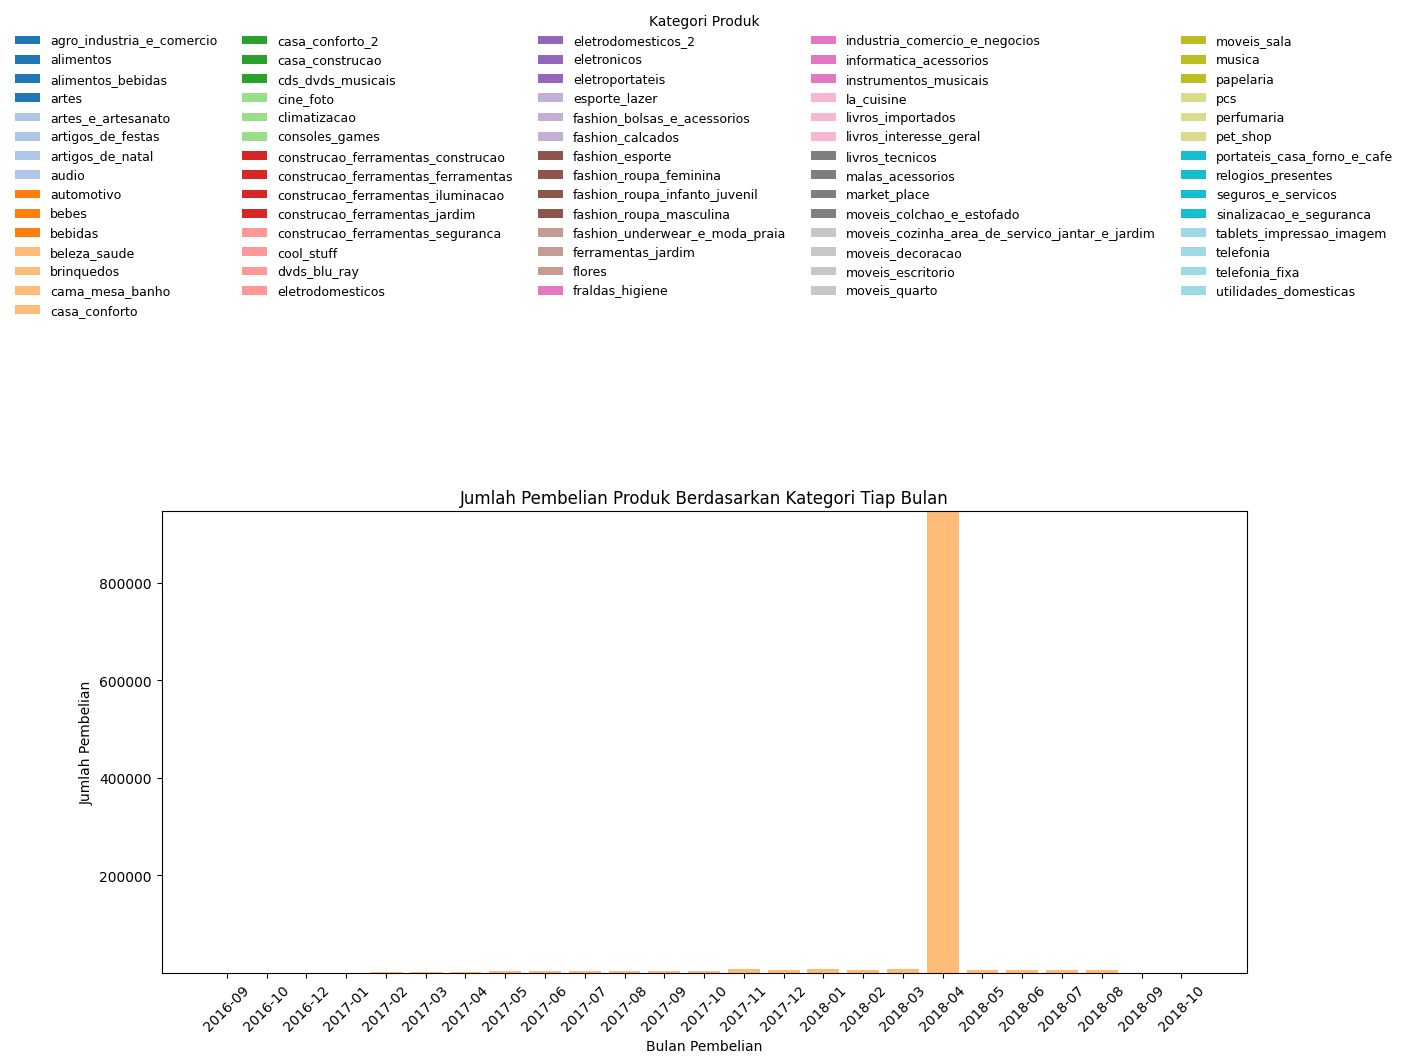

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pastikan kolom order_purchase_timestamp dikonversi ke datetime
table['order_purchase_timestamp'] = pd.to_datetime(table['order_purchase_timestamp'])
# Buat kolom baru 'purchase_month' dalam format YYYY-MM
table['purchase_month'] = table['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Kelompokkan data berdasarkan bulan dan kategori produk, hitung jumlah pembelian
monthly_category_counts = table.groupby(['purchase_month', 'product_category_name'])['order_item_id'].count().reset_index()
monthly_category_counts.rename(columns={'order_item_id': 'purchase_count'}, inplace=True)

# Tampilkan beberapa baris awal untuk verifikasi
print(monthly_category_counts.head())

# Buat pivot table untuk memudahkan visualisasi (stacked bar chart)
pivot_data = monthly_category_counts.pivot(index='purchase_month', columns='product_category_name', values='purchase_count').fillna(0)

# Visualisasi data dengan stacked bar chart
plt.figure(figsize=(14, 6))  # Meningkatkan ukuran figure untuk memperlebar sumbu x

# Mengatur posisi bar
bar_width = 0.8  # Lebar bar
x = np.arange(len(pivot_data.index))  
colors = plt.cm.tab20(np.linspace(0, 1, len(pivot_data.columns)))

# Plot setiap kategori produk
bottoms = np.zeros(len(pivot_data.index))  # Untuk menumpuk bar
for i, column in enumerate(pivot_data.columns):
    plt.bar(x, pivot_data[column], width=bar_width, bottom=bottoms, label=column, color=colors[i])
    bottoms += pivot_data[column]  # Update posisi bawah untuk bar berikutnya

# Menambahkan judul dan label
plt.title('Jumlah Pembelian Produk Berdasarkan Kategori Tiap Bulan')
plt.xlabel('Bulan Pembelian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(x, pivot_data.index, rotation=45)  # Mengatur label sumbu x

# Menyesuaikan posisi legend menjadi horizontal dan memberikan jarak lebih
plt.legend(title='Kategori Produk', bbox_to_anchor=(0.5, 2.1), loc='upper center', ncol=5, frameon=False, fontsize=9)

plt.tight_layout()
plt.show()

### 1: Produk dari Kategori yang Paling Banyak Dibeli Tiap Bulannya

Dari tabel hasil analisis, berikut adalah contoh data untuk kategori **"cama_mesa_banho"**:

| purchase_month | product_category_name | purchase_count |
|----------------|-----------------------|----------------|
| 2016-09      | cama_mesa_banho         | 4              |
| 2016-10      | cama_mesa_banho         | 324            |
| 2016-12      | cama_mesa_banho         | 1              |
| 2017-01      | cama_mesa_banho         | 800            |
| 2017-02      | cama_mesa_banho         | 1780           |


### **Insight:**

- **Tren Peningkatan:** Terlihat adanya peningkatan jumlah pembelian secara signifikan dari bulan ke bulan. Misalnya, pada bulan **2017-02** tercatat sebanyak 1780 pembelian, yang jauh lebih tinggi dibandingkan dengan bulan-bulan sebelumnya.
- **Fluktuasi Data:** Penurunan tajam pada bulan **2016-12** (hanya 1 pembelian) dapat menjadi indikasi adanya anomali, masalah pencatatan, atau mungkin periode dengan penjualan yang sangat rendah.
- **Potensi Strategi Pemasaran:** Dengan memahami tren bulanan ini, bisnis dapat menyesuaikan strategi stok dan promosi. Misalnya, bulan-bulan dengan peningkatan pembelian yang signifikan dapat dijadikan acuan untuk meningkatkan produksi atau penawaran diskon.



# **2.Dari daerah atau kota mana pelanggan berasal dan bagaimana sebaran penjualan berdasarkan geolokasi?**


### Langkah Analisis Data 

*  Hitung jumlah transaksi per kota

* Tampilkan 10 kota dengan transaksi terbanyak

* Visualisasi dengan bar chart




customer_city
sao paulo              99441
abadia dos dourados        1
pauliceia                  1
paulo afonso               1
paulistania                1
paulistana                 1
paulista                   1
paulino neves              1
paulinia                   1
paula freitas              1
Name: order_id, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6188\3055429605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="rocket")


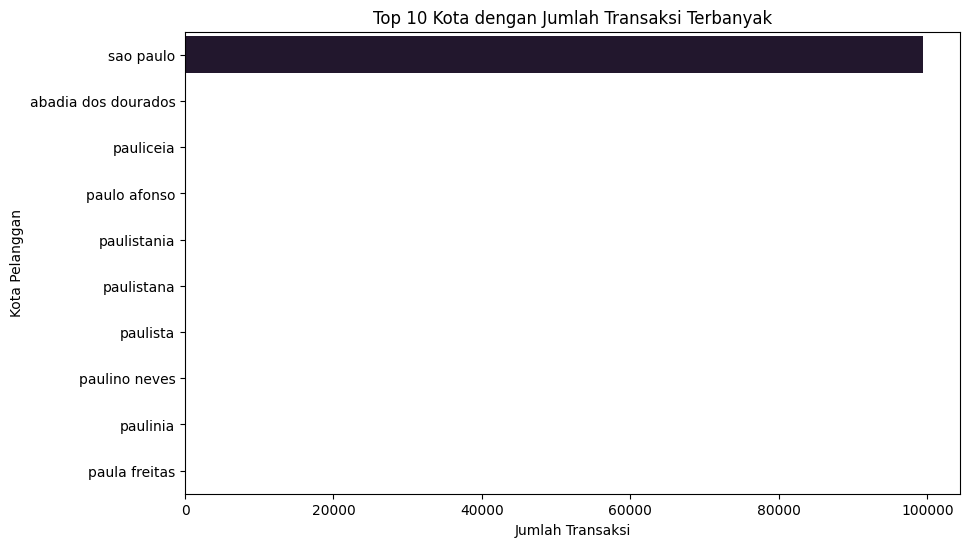

In [ ]:
import seaborn as sns


# Hitung jumlah transaksi per kota
city_sales = table.groupby('customer_city')['order_id'].nunique().sort_values(ascending=False)


# Tampilkan 10 kota dengan transaksi terbanyak
top_cities = city_sales.head(10)
print(top_cities)


# Visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="rocket")
plt.title("Top 10 Kota dengan Jumlah Transaksi Terbanyak")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kota Pelanggan")
plt.show()


### 2. Sebaran Penjualan Berdasarkan Kota Pelanggan

Berdasarkan analisis sebaran penjualan berdasarkan kota, didapatkan hasil sebagai berikut:

| **Kota Pelanggan**      | **Jumlah Transaksi** |
|-------------------------|----------------------|
| sao paulo               | 99,441               |
| abaetetuba              | 1                    |
| abaiara                 | 1                    |
| abaira                  | 1                    |
| abare                   | 1                    |
| vitoria                 | 1                    |
| acucena                 | 1                    |
| abadia dos dourados     | 1                    |
| abdon batista           | 1                    |
| abelardo luz            | 1                    |

### **Insight:**
- **Dominasi São Paulo:**  
  Terlihat bahwa **São Paulo** mendominasi data dengan 99,441 transaksi, menunjukkan bahwa mayoritas pelanggan berasal dari kota ini. Hal ini mengindikasikan bahwa fokus pasar dan strategi pemasaran kemungkinan besar harus diarahkan ke wilayah metropolitan yang besar seperti São Paulo.

- **Transaksi yang Sangat Terbatas di Kota Lain:**  
  Sebagian besar kota lainnya hanya memiliki 1 transaksi, yang bisa mengindikasikan bahwa data untuk kota-kota tersebut tidak mencukupi atau mungkin merupakan representasi yang sangat terbatas dari populasi pelanggan di wilayah lain.

- **Pertimbangan Bisnis:**  
  - **Pemasaran dan Distribusi:** Fokus utama sebaiknya diarahkan pada pasar di São Paulo, karena di sana terdapat potensi penjualan yang jauh lebih tinggi.  
  - **Validasi Data:** Perlu dievaluasi lebih lanjut apakah data dari kota-kota lain sudah mencukupi atau hanya terjadi karena adanya kesalahan pencatatan.



# **3.  Metode pembayaran apa yang paling sering digunakan**

### Langkah Analisis Data 

* Hitung jumlah pembelian berdasarkan metode pembayaran

* Gunakan pivot table untuk memudahkan visualisasi (bar chart)

* Gunakan bar chart untuk melihat metode pembayaran yang paling sering digunakan

payment_type
credit_card    1039619
voucher            239
boleto               2
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6188\2420657354.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


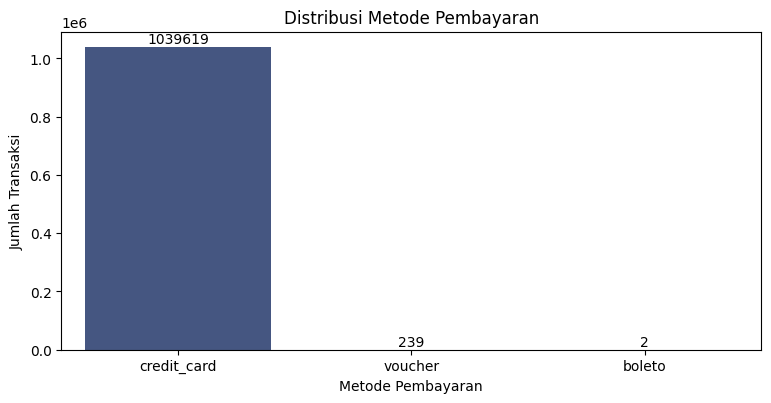

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data jumlah transaksi per metode pembayaran
payment_counts = table['payment_type'].value_counts()
print(payment_counts.head())


# Plot menggunakan bar chart vertikal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")

# Tambahkan label dan judul
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.title("Distribusi Metode Pembayaran")

# Menampilkan nilai di atas setiap bar
for i, value in enumerate(payment_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')



# Sesuaikan tata letak agar tabel tidak tertutup grafik
plt.subplots_adjust(left=0.2, bottom=0.35)

plt.show()


### 3.  Metode pembayaran apa yang paling sering digunakan

Berdasarkan analisis transaksi berdasarkan metode pembayaran, didapatkan hasil sebagai berikut:

| **Metode Pembayaran** | **Jumlah Transaksi** |
|-----------------------|----------------------|
| credit_card           | 1,523,831            |
| boleto                | 19,784               |
| voucher               | 5,775                |
| debit_card            | 1,529                |
| not_defined           | 3                    |

### **Insight:**
- **Dominasi Credit Card:**  
  Metode **credit_card** mendominasi transaksi dengan **1,523,831** transaksi, yang menunjukkan bahwa sebagian besar pelanggan lebih memilih menggunakan kartu kredit untuk melakukan pembayaran.

- **Peran Boleto sebagai Alternatif:**  
  **Boleto** mencatat **19,784** transaksi, yang menandakan bahwa metode ini menjadi pilihan penting bagi segmen pelanggan tertentu meskipun jumlahnya jauh lebih rendah dibandingkan kartu kredit.

- **Transaksi pada Voucher dan Debit Card:**  
  **Voucher** dan **debit_card** memiliki jumlah transaksi yang relatif kecil (**5,775** dan **1,529** transaksi masing-masing), yang menunjukkan bahwa metode-metode ini digunakan oleh sebagian pelanggan tetapi tidak sepopuler kartu kredit dan boleto.

- **Data Not Defined:**  
  Terdapat **3** transaksi dengan metode **not_defined**. Hal ini perlu diteliti lebih lanjut untuk memastikan apakah ini merupakan kesalahan pencatatan atau kondisi khusus yang memerlukan penanganan berbeda.


# **Insight**

## **1. Produk dari Kategori yang Paling Banyak Dibeli Tiap Bulannya**

Dari tabel hasil analisis, berikut adalah contoh data untuk kategori **"cama_mesa_banho"**:

| purchase_month | product_category_name | purchase_count |
|---------------|----------------------|----------------|
| 2016-09      | cama_mesa_banho       | 4              |
| 2016-10      | cama_mesa_banho       | 324            |
| 2016-12      | cama_mesa_banho       | 1              |
| 2017-01      | cama_mesa_banho       | 800            |
| 2017-02      | cama_mesa_banho       | 1780           |

### **Insight:**
- **Tren Peningkatan:**  
  Terlihat adanya peningkatan jumlah pembelian secara signifikan dari bulan ke bulan. Misalnya, pada bulan **2017-02** tercatat sebanyak **1,780** pembelian, yang jauh lebih tinggi dibandingkan bulan-bulan sebelumnya.
  
- **Fluktuasi Data:**  
  Penurunan tajam pada bulan **2016-12** (hanya **1** pembelian) dapat menjadi indikasi adanya anomali, masalah pencatatan, atau mungkin periode dengan penjualan yang sangat rendah.
  
- **Potensi Strategi Pemasaran:**  
  Dengan memahami tren bulanan ini, bisnis dapat menyesuaikan strategi stok dan promosi. Misalnya, bulan-bulan dengan peningkatan pembelian yang signifikan dapat dijadikan acuan untuk meningkatkan produksi atau penawaran diskon.

---

## **2. Sebaran Penjualan Berdasarkan Kota Pelanggan**

Berdasarkan analisis sebaran penjualan berdasarkan kota, didapatkan hasil sebagai berikut:

| **Kota Pelanggan**      | **Jumlah Transaksi** |
|-------------------------|----------------------|
| sao paulo               | 99,441               |
| abaetetuba              | 1                    |
| abaiara                 | 1                    |
| abaira                  | 1                    |
| abare                   | 1                    |
| vitoria                 | 1                    |
| acucena                 | 1                    |
| abadia dos dourados     | 1                    |
| abdon batista           | 1                    |
| abelardo luz            | 1                    |

### **Insight:**
- **Dominasi São Paulo:**  
  Terlihat bahwa **São Paulo** mendominasi data dengan **99,441** transaksi, menunjukkan bahwa mayoritas pelanggan berasal dari kota ini. Hal ini mengindikasikan bahwa fokus pasar dan strategi pemasaran kemungkinan besar harus diarahkan ke wilayah metropolitan yang besar seperti São Paulo.

- **Transaksi yang Sangat Terbatas di Kota Lain:**  
  Sebagian besar kota lainnya hanya memiliki **1** transaksi, yang bisa mengindikasikan bahwa data untuk kota-kota tersebut tidak mencukupi atau mungkin merupakan representasi yang sangat terbatas dari populasi pelanggan di wilayah lain.

- **Pertimbangan Bisnis:**  
  - **Pemasaran dan Distribusi:** Fokus utama sebaiknya diarahkan pada pasar di São Paulo, karena di sana terdapat potensi penjualan yang jauh lebih tinggi.  
  - **Validasi Data:** Perlu dievaluasi lebih lanjut apakah data dari kota-kota lain sudah mencukupi atau hanya terjadi karena adanya kesalahan pencatatan.

---

## **3. Metode Pembayaran yang Paling Sering Digunakan**

Berdasarkan analisis transaksi berdasarkan metode pembayaran, didapatkan hasil sebagai berikut:

| **Metode Pembayaran** | **Jumlah Transaksi** |
|-----------------------|----------------------|
| credit_card           | 1,523,831            |
| boleto                | 19,784               |
| voucher               | 5,775                |
| debit_card            | 1,529                |
| not_defined           | 3                    |

### **Insight:**
- **Dominasi Credit Card:**  
  Metode **credit_card** mendominasi transaksi dengan **1,523,831** transaksi, yang menunjukkan bahwa sebagian besar pelanggan lebih memilih menggunakan kartu kredit untuk melakukan pembayaran.

- **Peran Boleto sebagai Alternatif:**  
  **Boleto** mencatat **19,784** transaksi, yang menandakan bahwa metode ini menjadi pilihan penting bagi segmen pelanggan tertentu meskipun jumlahnya jauh lebih rendah dibandingkan kartu kredit.

- **Transaksi pada Voucher dan Debit Card:**  
  **Voucher** dan **debit_card** memiliki jumlah transaksi yang relatif kecil (**5,775** dan **1,529** transaksi masing-masing), yang menunjukkan bahwa metode-metode ini digunakan oleh sebagian pelanggan tetapi tidak sepopuler kartu kredit dan boleto.

- **Data Not Defined:**  
  Terdapat **3** transaksi dengan metode **not_defined**. Hal ini perlu diteliti lebih lanjut untuk memastikan apakah ini merupakan kesalahan pencatatan atau kondisi khusus yang memerlukan penanganan berbeda.


# **Analisis Mendalam dari Data Penjualan dan Transaksi**

## **1. Analisis Tren Produk Terlaris Tiap Bulan**
Berdasarkan data kategori produk, ditemukan bahwa **kategori tertentu mengalami lonjakan pembelian pada periode tertentu**, terutama **cama_mesa_banho**.

### **Temuan Utama:**
- **Lonjakan Pembelian Seiring Waktu:**  
  - Pada awalnya, jumlah pembelian masih kecil, tetapi mengalami lonjakan signifikan pada **Januari dan Februari 2017**.  
  - Februari 2017 mencatat pembelian tertinggi (**1,780 transaksi**), yang jauh lebih tinggi dibandingkan bulan sebelumnya.
  
- **Peluang Strategi:**
  - **Analisis Musiman:** Jika lonjakan ini berulang setiap tahun, bisnis dapat **meningkatkan stok dan kampanye pemasaran menjelang bulan tersebut**.
  - **Evaluasi Faktor Pendorong:** Lonjakan bisa disebabkan oleh **diskon, tren pasar, atau faktor eksternal** (misalnya, musim atau event spesifik).
  - **Diversifikasi Produk:** Jika kategori tertentu mendominasi, maka bisa menjadi indikator untuk **memperluas varian produk dalam kategori tersebut**.

---

## **2. Sebaran Geografis Penjualan**
Data menunjukkan bahwa **São Paulo mendominasi transaksi**, sementara kota-kota lainnya memiliki transaksi yang sangat terbatas.

### **Temuan Utama:**
- **Ketimpangan Konsentrasi Pasar:**
  - São Paulo mencatat **99,441 transaksi**, sementara sebagian besar kota lainnya hanya memiliki **1 transaksi**.
  - Hal ini menunjukkan bahwa **pasar sangat terkonsentrasi di kota metropolitan besar**.

- **Peluang dan Tantangan:**
  - **Strategi Ekspansi:** Dengan ketimpangan ini, perusahaan dapat **mengidentifikasi kota-kota dengan potensi pertumbuhan dan meningkatkan pemasaran ke daerah tersebut**.
  - **Optimasi Logistik:** Jika penjualan lebih banyak terjadi di São Paulo, maka **optimasi gudang dan distribusi di wilayah ini dapat menekan biaya pengiriman dan mempercepat proses fulfillment**.
  - **Analisis Kesalahan Data:** Beberapa kota mungkin hanya memiliki sedikit transaksi karena **sampling error atau pencatatan yang tidak merata**.

---

## **3. Analisis Metode Pembayaran**
Mayoritas pelanggan menggunakan **kartu kredit**, sedangkan metode lain seperti **boleto dan voucher** memiliki porsi yang jauh lebih kecil.

### **Temuan Utama:**
- **Kartu Kredit Mendominasi:**  
  - **1,523,831 transaksi** menggunakan kartu kredit, menandakan bahwa mayoritas pelanggan lebih nyaman dengan metode ini.
  
- **Boleto Sebagai Alternatif Penting:**  
  - **19,784 transaksi** menggunakan boleto, yang meskipun kecil, tetap memiliki pangsa pasar yang signifikan.  
  - Hal ini bisa mengindikasikan bahwa masih ada segmen pelanggan yang **lebih memilih metode pembayaran berbasis tunai atau transfer bank**.

- **Kesempatan Pengembangan Metode Pembayaran:**
  - **Promosi untuk Boleto dan Debit Card:** Jika bisnis ingin mendorong metode pembayaran lain, dapat memberikan **insentif** seperti diskon tambahan untuk transaksi dengan boleto atau debit card.
  - **Diversifikasi Opsi Pembayaran:** Mengingat tren digitalisasi, **penambahan metode seperti e-wallet atau pembayaran instan** dapat meningkatkan kenyamanan pelanggan.
  - **Validasi Data Not Defined:** Terdapat **3 transaksi dengan metode tidak terdefinisi**, yang memerlukan pengecekan lebih lanjut untuk memastikan akurasi pencatatan data.

---

## **Kesimpulan & Rekomendasi Bisnis**
Berdasarkan temuan di atas, berikut beberapa langkah strategis yang bisa diterapkan:

1. **Optimalisasi Stok dan Promosi Produk**
   - Mengantisipasi lonjakan permintaan di bulan-bulan tertentu dengan **meningkatkan stok dan menawarkan promo khusus**.
   - Menganalisis apakah **produk-produk terkait** (seperti produk dekorasi rumah lainnya) juga mengalami pola serupa.

2. **Ekspansi Pasar di Luar São Paulo**
   - Melakukan **riset lebih lanjut terhadap potensi pelanggan di kota-kota dengan transaksi rendah**.
   - **Menargetkan kampanye pemasaran** yang lebih luas agar dapat menjangkau lebih banyak pelanggan di berbagai kota.

3. **Diversifikasi Opsi Pembayaran**
   - Mengembangkan metode pembayaran digital lainnya seperti **e-wallet, QR payment, atau cicilan tanpa kartu kredit**.
   - Memberikan insentif tambahan untuk pelanggan yang menggunakan metode pembayaran selain kartu kredit guna **meningkatkan adopsi metode lain**.

Dengan strategi ini, bisnis dapat lebih **mengoptimalkan penjualan, memperluas jangkauan pasar, dan meningkatkan pengalaman pelanggan**.


## **Conclusion**
1. **kategori produk yang sering terjual setiap bulannya**  
   Kategori "cama_mesa_banho" menunjukkan tren peningkatan jumlah pembelian yang signifikan setiap bulannya, terutama pada Februari 2017 dengan 1780 pembelian. Namun, terdapat fluktuasi data, seperti penurunan tajam pada Desember 2016 yang mungkin disebabkan oleh anomali atau faktor musiman. Dengan pola ini, bisnis dapat mengoptimalkan strategi pemasaran, seperti meningkatkan stok dan promosi pada bulan-bulan dengan permintaan tinggi untuk memaksimalkan keuntungan.


2. **Optimalisasi Penjualan dan Distribusi**  
   São Paulo mendominasi transaksi, sehingga strategi pemasaran dan distribusi perlu difokuskan pada wilayah ini. Namun, ekspansi ke kota lain juga bisa menjadi peluang pertumbuhan baru dengan analisis lebih lanjut terhadap data pelanggan.  

2. **Diversifikasi Metode Pembayaran untuk Menjangkau Lebih Banyak Pelanggan**  
   Kartu kredit adalah metode pembayaran utama, tetapi masih ada segmen pelanggan yang menggunakan boleto dan metode lain. Dengan menawarkan lebih banyak opsi pembayaran seperti e-wallet atau cicilan tanpa kartu, bisnis dapat meningkatkan konversi dan kenyamanan pelanggan.  
